In [2]:
from trainning import *

**Glove Embedding**

In [3]:
if True:
    train_iter, dev_iter, test_iter, TEXT = get_iterators()
    torch.save(TEXT.vocab.vectors, 'vectors.pth')
    PAD_IDX = TEXT.vocab.stoi[PAD]
    model = LSTMModel(HID_SIZE, TEXT)
    optimizer = torch.optim.Adadelta(model.parameters(), lr=LR)
    loss_func = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)
    min_dev_loss = float('inf')
    train_losses = []
    dev_losses = []

start = time.time()
epoch = 0
while epoch < EPOCHS:
    train_loss, train_acc = train(train_iter, model, optimizer, loss_func, pad_idx=PAD_IDX)
    dev_loss, dev_acc = eval(dev_iter, model, loss_func, pad_idx=PAD_IDX)
    
    end = time.time()
    train_losses.append(train_loss)
    dev_losses.append(dev_loss)

    if dev_loss < min_dev_loss:
        min_dev_loss = dev_loss
        min_dev_acc = dev_acc
        torch.save(model.state_dict(), 'model.pth')

    print("Epoch: {}, Train Loss: {:.4f}, Train Accuracy: {:.4f}, Dev Loss: {:.4f}, Dev Accuracy: {:.4f}, Duration: {:.2f} seconds"
          .format(epoch, train_loss, train_acc, dev_loss, dev_acc, end - start))

    epoch += 1


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 655.96it/s]


Epoch: 0, Train Loss: 5.7274, Train Accuracy: 0.1020, Dev Loss: 5.9894, Dev Accuracy: 0.0708, Duration: 5.34 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 508.86it/s]


Epoch: 1, Train Loss: 5.0327, Train Accuracy: 0.1391, Dev Loss: 5.7277, Dev Accuracy: 0.0891, Duration: 11.34 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 508.77it/s]


Epoch: 2, Train Loss: 4.9386, Train Accuracy: 0.1476, Dev Loss: 5.4404, Dev Accuracy: 0.1072, Duration: 17.03 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 476.35it/s]


Epoch: 3, Train Loss: 4.8975, Train Accuracy: 0.1486, Dev Loss: 5.5028, Dev Accuracy: 0.1044, Duration: 23.36 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 520.80it/s]


Epoch: 4, Train Loss: 4.8716, Train Accuracy: 0.1475, Dev Loss: 5.5359, Dev Accuracy: 0.1022, Duration: 29.38 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 503.85it/s]


Epoch: 5, Train Loss: 4.8554, Train Accuracy: 0.1490, Dev Loss: 5.5263, Dev Accuracy: 0.1046, Duration: 35.25 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 515.10it/s]


Epoch: 6, Train Loss: 4.8420, Train Accuracy: 0.1492, Dev Loss: 5.4914, Dev Accuracy: 0.1101, Duration: 40.91 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 609.67it/s]


Epoch: 7, Train Loss: 4.8334, Train Accuracy: 0.1504, Dev Loss: 5.6868, Dev Accuracy: 0.0924, Duration: 46.47 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 575.71it/s]


Epoch: 8, Train Loss: 4.8252, Train Accuracy: 0.1517, Dev Loss: 5.6093, Dev Accuracy: 0.0988, Duration: 52.10 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 541.16it/s]


Epoch: 9, Train Loss: 4.8186, Train Accuracy: 0.1507, Dev Loss: 5.5496, Dev Accuracy: 0.1009, Duration: 57.81 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 546.25it/s]


Epoch: 10, Train Loss: 4.8124, Train Accuracy: 0.1527, Dev Loss: 5.6239, Dev Accuracy: 0.0942, Duration: 63.73 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 525.38it/s]

Epoch: 11, Train Loss: 4.8080, Train Accuracy: 0.1508, Dev Loss: 5.5400, Dev Accuracy: 0.1009, Duration: 69.44 seconds


Text(0, 0.5, 'loss')

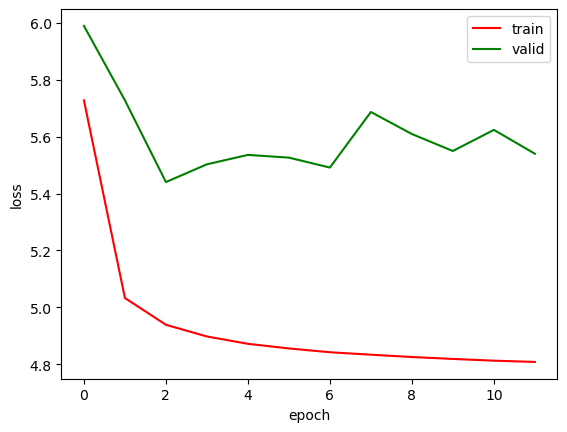

In [5]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, dev_losses):
    plt.plot(train_losses, label="train", color='r')
    plt.plot(dev_losses, label="valid", color='g')
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")

plot_losses(train_losses, dev_losses)


In [7]:
def print_sorted_words_by_accuracy(sorted_words, vocab, top_n=20):
    print("Top {} words w/ highest prediction accuracy:".format(top_n))
    for word, acc in sorted_words[:top_n]:
        print(f"{vocab.itos[word]}")

    print("\nBottom {} words w/ lowest prediction accuracy:".format(top_n))
    for word, acc in sorted_words[-top_n:]:
        print(f"{vocab.itos[word]}")

sorted_words = sort_words_by_accuracy(dev_iter, model)
print_sorted_words_by_accuracy(sorted_words, TEXT.vocab)


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 565.27it/s]

Top 20 words w/ highest prediction accuracy:
Sue
</s>
.
was
to
the
He
found
game
he
wanted
online
and
ordered
it
Bob
decided
list
his
car

Bottom 20 words w/ lowest prediction accuracy:
glasses
haircut
closet
light
power
driveway
wallet
pocket
talked
calm
customer
drink
raise
little
classmates
grateful
weight
laundry
evening
share


In [8]:
predict_sentences(dev_iter, model, TEXT.vocab, "prediction_embedding1.txt")

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 562.72it/s]


**Random embedding**

In [9]:
if True:
    train_iter, dev_iter, test_iter, TEXT = get_iterators(precond=False)
    torch.save(TEXT.vocab.vectors, 'vectors.pth')
    PAD_IDX = TEXT.vocab.stoi[PAD]
    model = LSTMModel(HID_SIZE, TEXT)
    optimizer = torch.optim.Adadelta(model.parameters(), lr=LR)
    loss_func = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)
    min_dev_loss = float('inf')
    train_losses = []
    dev_losses = []

start = time.time()
epoch = 0
while epoch < EPOCHS:
    train_loss, train_acc = train(train_iter, model, optimizer, loss_func, pad_idx=PAD_IDX)
    dev_loss, dev_acc = eval(dev_iter, model, loss_func, pad_idx=PAD_IDX)
    
    end = time.time()
    train_losses.append(train_loss)
    dev_losses.append(dev_loss)

    if dev_loss < min_dev_loss:
        min_dev_loss = dev_loss
        min_dev_acc = dev_acc
        torch.save(model.state_dict(), 'model.pth')

    print("Epoch: {}, Train Loss: {:.4f}, Train Accuracy: {:.4f}, Dev Loss: {:.4f}, Dev Accuracy: {:.4f}, Duration: {:.2f} seconds"
          .format(epoch, train_loss, train_acc, dev_loss, dev_acc, end - start))

    epoch += 1

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 636.81it/s]


Epoch: 0, Train Loss: 5.8674, Train Accuracy: 0.1019, Dev Loss: 6.0830, Dev Accuracy: 0.0529, Duration: 5.31 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 574.13it/s]


Epoch: 1, Train Loss: 5.0408, Train Accuracy: 0.1402, Dev Loss: 5.7225, Dev Accuracy: 0.0889, Duration: 10.86 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 525.47it/s]


Epoch: 2, Train Loss: 4.9460, Train Accuracy: 0.1470, Dev Loss: 5.3925, Dev Accuracy: 0.1188, Duration: 16.49 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 483.12it/s]


Epoch: 3, Train Loss: 4.9023, Train Accuracy: 0.1474, Dev Loss: 5.3161, Dev Accuracy: 0.1212, Duration: 22.18 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 552.64it/s]


Epoch: 4, Train Loss: 4.8768, Train Accuracy: 0.1480, Dev Loss: 5.4572, Dev Accuracy: 0.1038, Duration: 27.57 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 485.23it/s]


Epoch: 5, Train Loss: 4.8596, Train Accuracy: 0.1480, Dev Loss: 5.3688, Dev Accuracy: 0.1126, Duration: 33.67 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 487.43it/s]


Epoch: 6, Train Loss: 4.8470, Train Accuracy: 0.1492, Dev Loss: 5.5231, Dev Accuracy: 0.0959, Duration: 39.84 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 521.16it/s]


Epoch: 7, Train Loss: 4.8364, Train Accuracy: 0.1497, Dev Loss: 5.5191, Dev Accuracy: 0.1001, Duration: 45.51 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 522.24it/s]


Epoch: 8, Train Loss: 4.8278, Train Accuracy: 0.1494, Dev Loss: 5.6307, Dev Accuracy: 0.0941, Duration: 51.36 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 483.51it/s]


Epoch: 9, Train Loss: 4.8218, Train Accuracy: 0.1490, Dev Loss: 5.4456, Dev Accuracy: 0.1088, Duration: 57.39 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 571.37it/s]


Epoch: 10, Train Loss: 4.8153, Train Accuracy: 0.1515, Dev Loss: 5.5488, Dev Accuracy: 0.1031, Duration: 62.99 seconds


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 535.21it/s]

Epoch: 11, Train Loss: 4.8102, Train Accuracy: 0.1513, Dev Loss: 5.5353, Dev Accuracy: 0.0994, Duration: 68.73 seconds


Text(0, 0.5, 'loss')

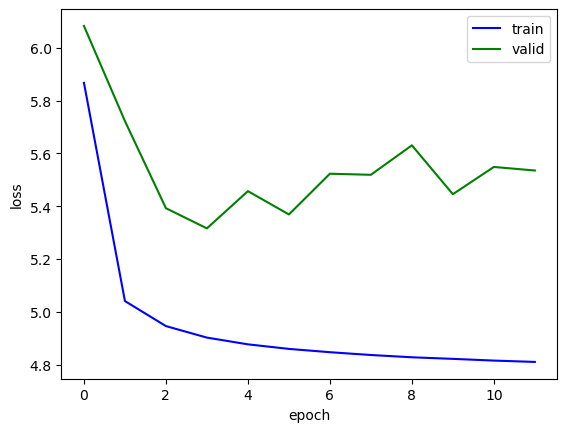

In [10]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, dev_losses):
    plt.plot(train_losses, label="train", color='r')
    plt.plot(dev_losses, label="valid", color='g')
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")

plot_losses(train_losses, dev_losses)


In [13]:
def print_sorted_words_by_accuracy(sorted_words, vocab, top_n=20):
    print("Top {} words w/ the highest prediction accuracy:".format(top_n))
    index = 0
    while index < top_n:
        word, acc = sorted_words[index]
        print(f"{vocab.itos[word]}")
        index += 1

    print("\nBottom {} words w/ the lowest prediction accuracy:".format(top_n))
    index = -top_n
    while index < 0:
        word, acc = sorted_words[index]
        print(f"{vocab.itos[word]}")
        index += 1

sorted_words = sort_words_by_accuracy(dev_iter, model, pad_idx=PAD_IDX)
print_sorted_words_by_accuracy(sorted_words, TEXT.vocab)

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 545.03it/s]

Top 20 words w/ the highest prediction accuracy:
Bob
to
</s>
was
.
He
found
the
game
he
wanted
online
and
ordered
it
decided
list
his
car
rest

Bottom 20 words w/ the lowest prediction accuracy:
glasses
haircut
closet
light
power
driveway
wallet
pocket
talked
calm
customer
drink
raise
little
classmates
grateful
weight
laundry
evening
share


In [12]:
predict_sentences(dev_iter, model, TEXT.vocab, "prediction_embedding2.txt")

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 574.68it/s]
